So, here's the TL/DR: 
 ⚡⚡⚡
1. A clear and logical project structure. 
- Overview/Exec summary 
 
- Data cleaning + transformation 
 
- EDA/Analysis 
 
- Recommendations 
 
2. Focus more on the analysis than the tool. 
 
3. Keep it short and concise. 
 
4. Create projects you're passionate about and/or related to the role you're applying for. 
 
5. Consider data visualisation. 


# Time Series Modeling: Romanian Electricity

## Overview
- This project will attempt to build an ARIMA model on hourly electricity consumption and production rates for Romania from 2019 to mid-March 2023.

Analysis will attempt manual and auto-ARIMA derivations of 

- **P**: lag order (AutoRegressive Component - AR)
- **D**: degree of differencing (Integragtion Component - I)
- **Q**: order of the moving average (Moving Average Component - MA)
---

[Data Source](https://www.kaggle.com/datasets/stefancomanita/hourly-electricity-consumption-and-production)

Table Data
All values in MegaWatts (MW)

| Fields | Interpretation | Example |
| --- | --- | --- |
| DateTime | Hourly Timestamp | 1/1/2019  7:00:00 AM |
| Consumption | Total Romanian Energy Consumption (MW) | 5524 |
| Production | Total Romanian Energy Production (MW) | 5547 |
| Nuclear | Total Romanian Nuclear Energy Consumption (MW) | 1392 |
| Wind | Total Romanian Wind Energy Production (MW) | 93 |
| Hydroelectric | Total Romanian Hydroelectric Energy Production (MW) | 1187 |
| Oil and Gas | Total Romanian Oil and Gas Energy Production (MW) | 1446 |
| Coal | Total Romanian Coal Energy Production (MW) | 1394 |
| Solar | Total Romanian Solar Energy Production (MW) | 0 |
| Biomass | Total Romanian Biomass Energy Production (MW) | 34 |

## Overview / Executive Summary

In [30]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
import os
import matplotlib.pyplot as plt

#Load the CSV file as dataframe, df
os.chdir(r"C:\Users\Public\Documents")
df = pd.read_csv("electricityConsumptionAndProductioction.csv")

# Confirm loading CSV
# Look at the dataframe structure

print(df.info())
print(df.describe())

df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36772 entries, 0 to 36771
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   DateTime       36772 non-null  object
 1   Consumption    36772 non-null  int64 
 2   Production     36772 non-null  int64 
 3   Nuclear        36772 non-null  int64 
 4   Wind           36772 non-null  int64 
 5   Hydroelectric  36772 non-null  int64 
 6   Oil and Gas    36772 non-null  int64 
 7   Coal           36772 non-null  int64 
 8   Solar          36772 non-null  int64 
 9   Biomass        36772 non-null  int64 
dtypes: int64(9), object(1)
memory usage: 2.8+ MB
None
        Consumption    Production       Nuclear          Wind  Hydroelectric  \
count  36772.000000  36772.000000  36772.000000  36772.000000   36772.000000   
mean    6707.924889   6543.770478   1293.468590    785.700723    1801.603149   
std     1034.961146   1005.486125    237.348752    681.508967     678.981785   


,DateTime,Consumption,Production,Nuclear,Wind,Hydroelectric,Oil and Gas,Coal,Solar,Biomass
0,2019-01-01 00:00:00,6352,6527,1395,79,1383,1896,1744,0,30
1,2019-01-01 01:00:00,6116,5701,1393,96,1112,1429,1641,0,30
2,2019-01-01 02:00:00,5873,5676,1393,142,1030,1465,1616,0,30
3,2019-01-01 03:00:00,5682,5603,1397,191,972,1455,1558,0,30
4,2019-01-01 04:00:00,5557,5454,1393,159,960,1454,1458,0,30


## Data Cleaning & Transformation
- I trust that outliers are real due to national level monitoring systems

1. Check for duplicates and missing values
     - Time series data cannot have missing values
     - Initial glimpse at data above suggests no missing values (36,772 values across all fields)
2. Convert DateTime to a timestamp data type
   - Potentially Aggregate into daily averages depending on computing power

In [31]:
# Check for any missing values
df.isnull().values.any()

False

In [32]:
# No missing records

# Check for any Duplicates
df.duplicated().values.any()

True

In [33]:
# Identify duplicates
df[df.duplicated()]

,DateTime,Consumption,Production,Nuclear,Wind,Hydroelectric,Oil and Gas,Coal,Solar,Biomass
7180,2019-10-27 03:00:00,5196,4459,1373,74,725,719,1515,0,50
15917,2020-10-25 03:00:00,5220,5412,1418,1188,1098,594,1048,0,65
24822,2021-10-31 03:00:00,5341,5258,1415,141,934,1314,1393,0,58
33559,2022-10-30 03:00:00,4503,5269,1384,544,1289,924,1073,0,52


In [34]:
# 4 duplicate records
# Drop duplicates, keep one record
df.drop_duplicates(inplace = True)

# Check for any Duplicates
df.duplicated().values.any()

False

In [35]:
# Conver DateTime to datetime datatype
df['DateTime'] = pd.to_datetime(df['DateTime'])
df['DateTime'].dtype

dtype('<M8[ns]')

In [36]:
# Concerned, I check for duplicate time stamps
df[df['DateTime'].duplicated()]

,DateTime,Consumption,Production,Nuclear,Wind,Hydroelectric,Oil and Gas,Coal,Solar,Biomass
7179,2019-10-27 03:00:00,5196,4459,1373,74,725,719,1515,0,50
15916,2020-10-25 03:00:00,5220,5412,1418,1188,1098,594,1048,0,65
24821,2021-10-31 03:00:00,5341,5258,1415,141,934,1314,1393,0,58
33558,2022-10-30 03:00:00,4503,5269,1384,544,1289,924,1073,0,52


In [37]:
# Observe a timestamp duplicate
df[df['DateTime'] == '2019-10-27 03:00:00']


,DateTime,Consumption,Production,Nuclear,Wind,Hydroelectric,Oil and Gas,Coal,Solar,Biomass
7178,2019-10-27 03:00:00,5186,4478,1373,77,750,696,1532,0,49
7179,2019-10-27 03:00:00,5196,4459,1373,74,725,719,1515,0,50


In [38]:
# Values are close, I will aggregate by hourly average
#Index by timestampe
df.set_index('DateTime', inplace = True)
#Aggregate by hourly average
df_clean = df.groupby(df.index.to_series()).mean()

In [39]:
#observe the cleaned df
df_clean.head()

,Consumption,Production,Nuclear,Wind,Hydroelectric,Oil and Gas,Coal,Solar,Biomass
DateTime,,,,,,,,,
2019-01-01 00:00:00,6352.0,6527.0,1395.0,79.0,1383.0,1896.0,1744.0,0.0,30.0
2019-01-01 01:00:00,6116.0,5701.0,1393.0,96.0,1112.0,1429.0,1641.0,0.0,30.0
2019-01-01 02:00:00,5873.0,5676.0,1393.0,142.0,1030.0,1465.0,1616.0,0.0,30.0
2019-01-01 03:00:00,5682.0,5603.0,1397.0,191.0,972.0,1455.0,1558.0,0.0,30.0
2019-01-01 04:00:00,5557.0,5454.0,1393.0,159.0,960.0,1454.0,1458.0,0.0,30.0


"\n#Check for outliers using boxplots\nfig,axs = plt.subplots(2,3, figsize = (8,8))\n\nsns.boxplot(df_curated['Age'], ax = axs[0,0])\nsns.boxplot(df_curated['Bandwidth_GB_Year'], ax = axs[0,1])\nsns.boxplot(df_curated['Income'], ax = axs[0,2])\nsns.boxplot(df_curated['Population'], ax = axs[1,0])\nsns.boxplot(df_curated['Children'], ax = axs[1,1])\n\naxs[0,0].set_xlabel('Age')\naxs[0,1].set_xlabel('Bandwidth_GB_Year')\naxs[0,2].set_xlabel('Income')\naxs[1,0].set_xlabel('Population')\naxs[1,1].set_xlabel('Children')\n\nset y label\n\nfig.tight_layout()\n"

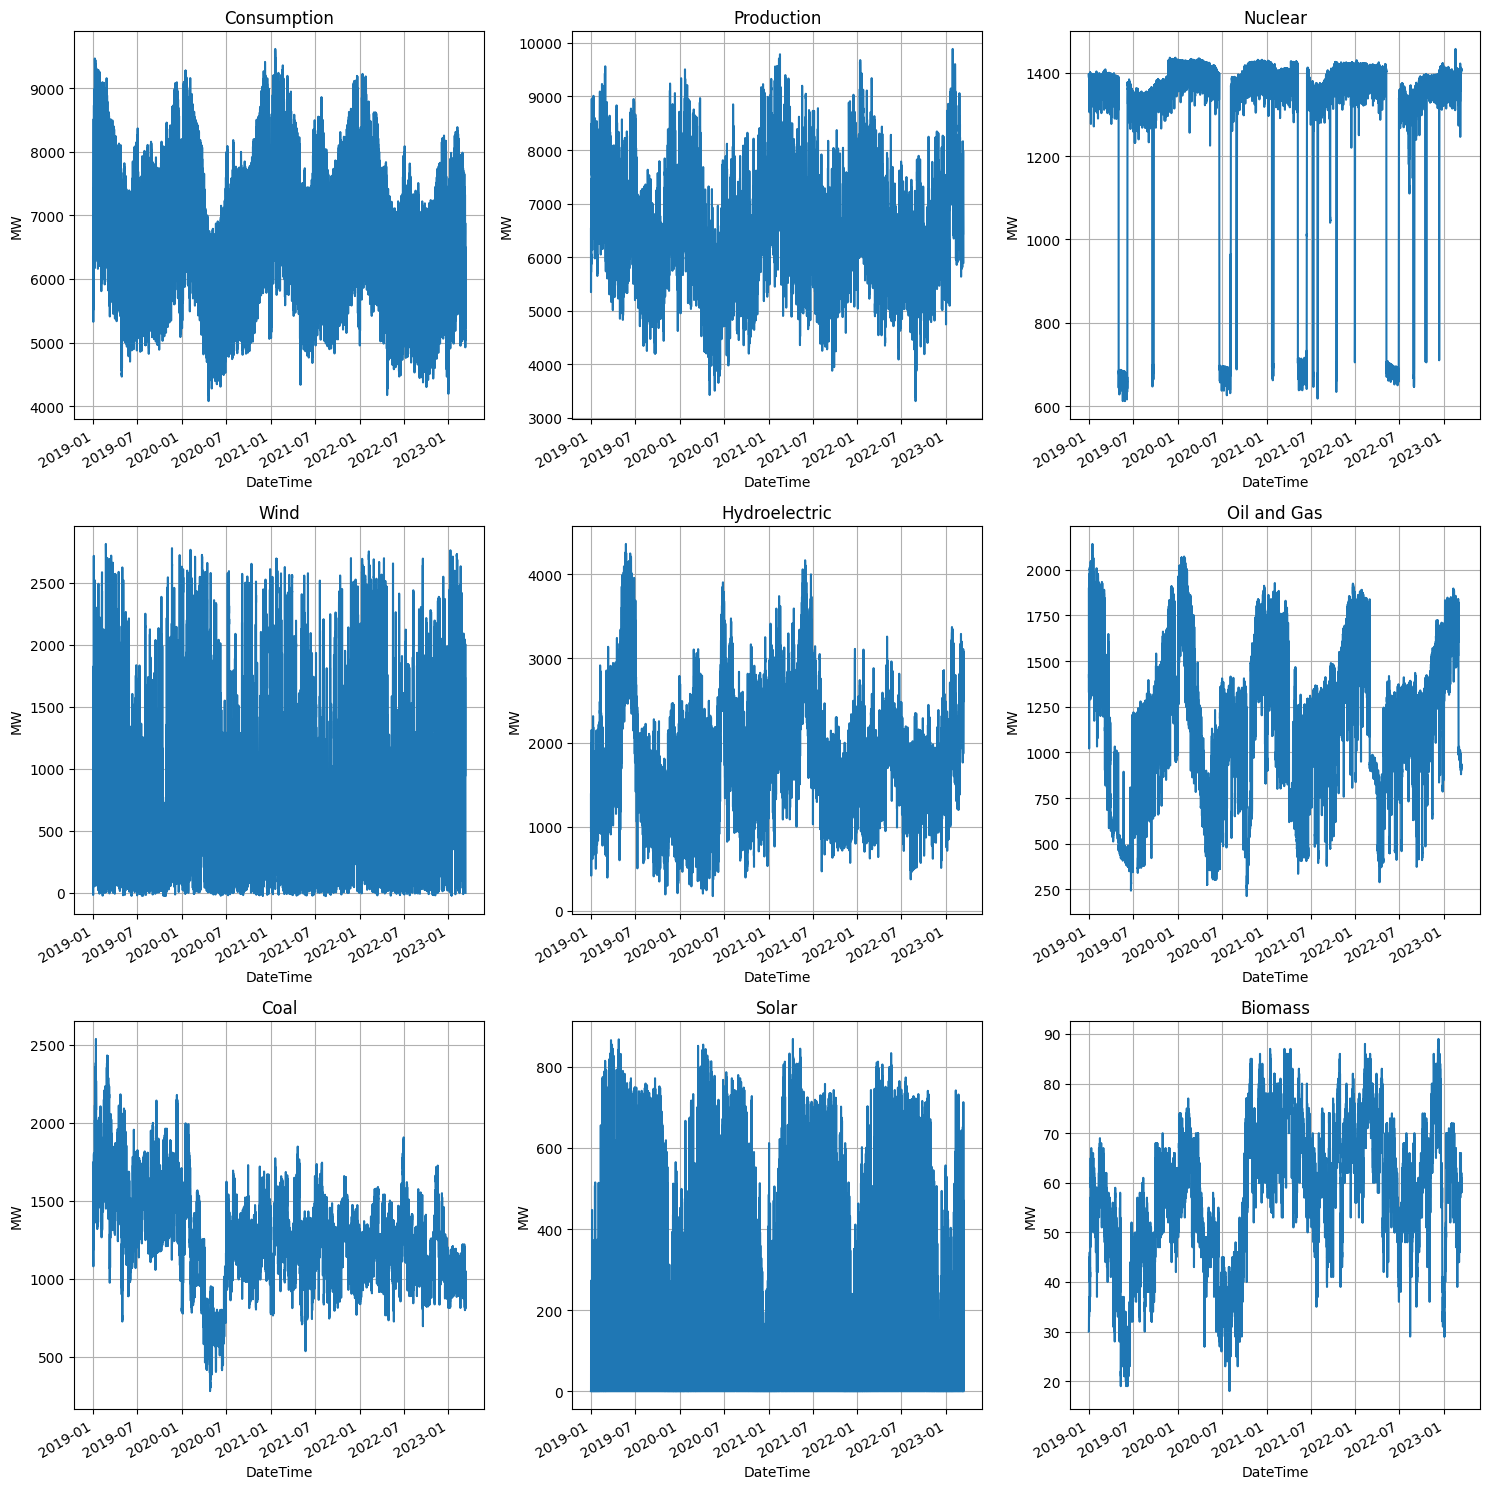

In [47]:
# Plot Romainian Energy 
fig,axs = plt.subplots(3,3, figsize = (15,15))

columns_to_plot = ['Consumption', 'Production', 'Nuclear', 'Wind', 'Hydroelectric', 'Oil and Gas', 'Coal', 'Solar', 'Biomass']

# Iterate over the columns and plot each one on a separate subplot
for i, column in enumerate(columns_to_plot):
    row = i // 3
    col = i % 3
    ax = axs[row, col]
    df_clean[column].plot(grid=True, ax=ax)
    ax.set_title(column)
axs[0,0].set_ylabel('MW')
axs[0,1].set_ylabel('MW')
axs[0,2].set_ylabel('MW')
axs[1,0].set_ylabel('MW')
axs[1,1].set_ylabel('MW')
axs[1,2].set_ylabel('MW')
axs[2,0].set_ylabel('MW')
axs[2,1].set_ylabel('MW')
axs[2,2].set_ylabel('MW')

fig.tight_layout()


### Data Cleaning Complete
- Duplicates Removed
- Duplicates by timestamp have been averaged
- DateTime column is converted to Timestamp

## Model Development

## Reccomendations